In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scCAMUS.metric import CAMUS_score, CAMUS_prioritize
from scCAMUS.preprocess import precluster_scRNA_scST

import warnings
warnings.filterwarnings("ignore")

## 1. We first load the annotated adata (the mouse hypothalamic region)

We have the maual annotation in 'celltype' and the annotation results from four different methods, i.e., STAMapper, scANVI, RCTD and Tangram.

In [2]:
adata_raw = sc.read_h5ad('../data/MERFISH_hypothalamic_annotated.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 31340 × 160
    obs: 'Animal_ID', 'celltype', 'STAMapper', 'scANVI', 'RCTD', 'Tangram'
    var: 'n_cells'
    obsm: 'spatial'

## 2. We then preprocess the data and then performed pre-clustering

For the scRNA-seq or scST datasets, we used 'precluster_scRNA_scST' function.

In [3]:
adata = precluster_scRNA_scST(adata_raw.copy(), resolution=0.4)

The resolution parameter controls the number of clusters, with a default value of 0.4. You can visualize the clustering results and the annotation results on the UMAP to guide the selection of this parameter. Also, an appropriate resolution should result in a number of clusters that closely matches the number of cell types from the reference dataset.

## 3. We next calculate the CAMUS score for each method, and then prioritize them

In [4]:
prioritized_dict = CAMUS_prioritize(adata, key_class=['STAMapper', 'scANVI', 'RCTD', 'Tangram'])
prioritized_dict

{'STAMapper': 0.7164170199439406,
 'scANVI': 0.5891639318359273,
 'RCTD': 0.5175068689354554,
 'Tangram': 0.24063115124187084}

In [5]:
# Use acc_dict to score the annotation accuracy
acc_dict = {}
for ele in ['STAMapper', 'scANVI', 'RCTD', 'Tangram']:
    accuracy = np.mean(adata.obs['celltype'].astype(str) == adata.obs[ele].astype(str))
    acc_dict[ele] = accuracy
acc_dict

{'STAMapper': 0.9175813656668794,
 'scANVI': 0.806509253350351,
 'RCTD': 0.7664007657945118,
 'Tangram': 0.34700063816209314}

## 4 Visualize the data and the CAMUS score, annotation accuracy

In [6]:
palette = {
    'Astrocytes': '#f3cd6d',
    'Endothelial': '#c5d9bf',
    'Ependymal': '#cd745b',
    'Excitatory': '#1793a6',
    'Inhibitory': '#092c45',
    'Microglia': '#8c564b',
    'Mural': '#e377c2',#ece5c2
    'OD Immature': '#8cc6ca',
    'OD Mature': '#5c4b51',
    'Fibroblast':'#2f8249',
     'Macrophage':'#cc9a81',
    'OD Newly formed':'#ab96b5'
}

sc.pp.normalize_total(adata_raw, target_sum=1e4)
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw, max_value=10)
sc.tl.pca(adata_raw, svd_solver="arpack")
sc.pp.neighbors(adata_raw, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_raw, resolution=0.4)
sc.tl.umap(adata_raw)

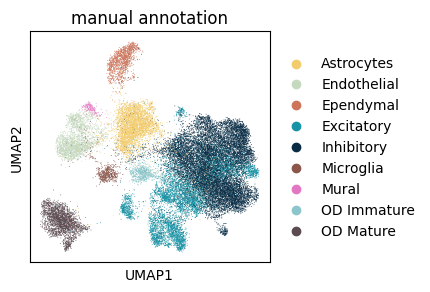

In [7]:
fig, ax = plt.subplots(figsize=(3.1, 3)) 
sc.pl.umap(adata_raw, color=["celltype"], size=1.5, palette=palette, ax=ax, show=False)
ax.set_title("manual annotation") 
plt.show()

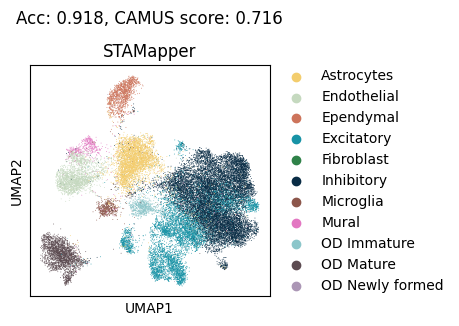

In [8]:
fig, ax = plt.subplots(figsize=(3.1, 3)) 
sc.pl.umap(adata_raw, color=["STAMapper"], size=1.5, palette=palette, ax=ax, show=False)
ax.set_title("STAMapper")
ax.text(0.5, 1.18, "Acc: 0.918, CAMUS score: 0.716", transform=ax.transAxes, fontsize=12, ha='center')
plt.show()

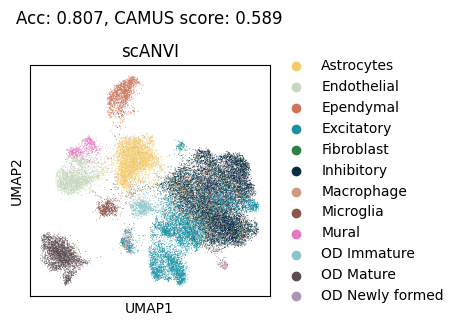

In [9]:
fig, ax = plt.subplots(figsize=(3.1, 3)) 
sc.pl.umap(adata_raw, color=["scANVI"], size=1.5, palette=palette, ax=ax, show=False)
ax.set_title("scANVI")
ax.text(0.5, 1.18, "Acc: 0.807, CAMUS score: 0.589", transform=ax.transAxes, fontsize=12, ha='center')
plt.show()

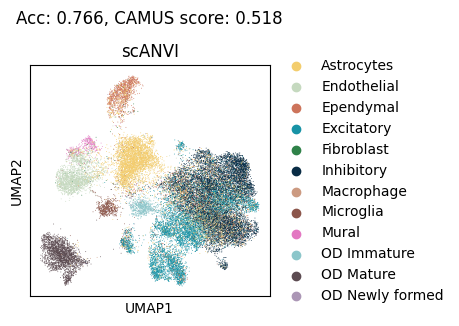

In [10]:
fig, ax = plt.subplots(figsize=(3.1, 3)) 
sc.pl.umap(adata_raw, color=["RCTD"], size=1.5, palette=palette, ax=ax, show=False)
ax.set_title("scANVI")
ax.text(0.5, 1.18, "Acc: 0.766, CAMUS score: 0.518", transform=ax.transAxes, fontsize=12, ha='center')
plt.show()

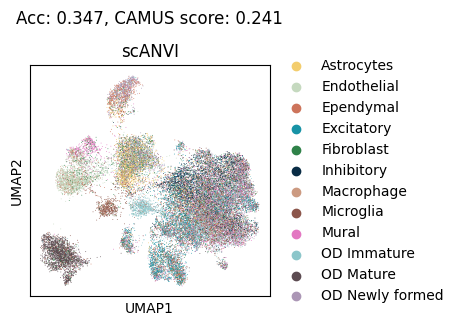

In [11]:
fig, ax = plt.subplots(figsize=(3.1, 3)) 
sc.pl.umap(adata_raw, color=["Tangram"], size=1.5, palette=palette, ax=ax, show=False)
ax.set_title("scANVI")
ax.text(0.5, 1.18, "Acc: 0.347, CAMUS score: 0.241", transform=ax.transAxes, fontsize=12, ha='center')
plt.show()